In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
import matplotlib.pyplot as plt

In [ ]:
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

df = pd.DataFrame({
    "x": [-1, 0, 1, 2, 3, 4],
    "y" : [-3, -1, 1, 3, 5, 7]
})
df

,x,y
0,-1,-3
1,0,-1
2,1,1
3,2,3
4,3,5
5,4,7


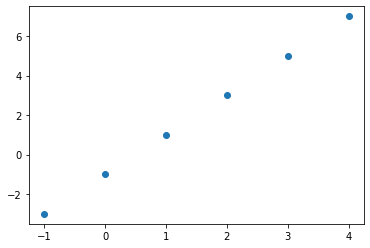

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape=[1]),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ],name ='staright_line_model')

model.summary()

Model: "staright_line_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)

model.compile(loss='mean_squared_error', optimizer=optimizer)

model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 760ms/step - loss: 10.2512
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 2.2913
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 1.1895
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 3.3282
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 1.4153
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8166
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1430
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1596
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1987
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2438
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3298
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3333
Epoch 13/500
1/1 [==============================] - 0s 5ms

In [ ]:
print(model.predict([-1]))

[[-2.7647455]]


In [ ]:
print(model.predict([-1, 0, 1, 2, 3, 4]))

[[-2.7647457]
 [-0.9125429]
 [ 1.1603472]
 [ 3.3016703]
 [ 5.3950853]
 [ 7.488501 ]]


In [ ]:
predicted_y = model.predict(x)
print(predicted_y)

[[-2.7647457]
 [-0.9125429]
 [ 1.1603472]
 [ 3.3016703]
 [ 5.3950853]
 [ 7.488501 ]]


In [ ]:
import numpy as np
y_pred_round = []
for i in predicted_y:
  y_pred_round.append(np.round(i))

from sklearn.metrics import confusion_matrix as cm
print(cm(y, y_pred_round))

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


In [ ]:
model.predict([-1])[0][0]

-2.7647455

<function seaborn.distributions.histplot>

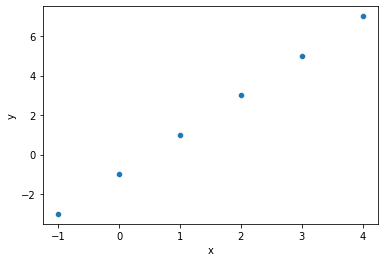

In [ ]:
import seaborn as sns
predicted_df = pd.DataFrame({
    "x" : x,
    "y" : y
})
sns.scatterplot(x='x', y='y', data=predicted_df)
sns.histplot

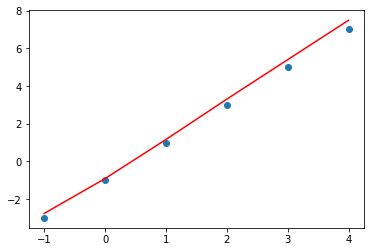

In [ ]:
plt.scatter(x, y)
plt.plot(x, predicted_y, color='red')
plt.show()

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgfngvowb/assets


In [ ]:
!pip install ml_metadata
import ml_metadata as mlmd
from ml_metadata.metadata_store import metadata_store
from ml_metadata.proto import metadata_store_pb2

     |████████████████████████████████| 2.9MB 7.2MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: attrs 21.2.0
    Uninstalling attrs-21.2.0:
      Successfully uninstalled attrs-21.2.0


In [ ]:
connection_config = metadata_store_pb2.ConnectionConfig()
connection_config.fake_database.SetInParent() # Sets an empty fake database proto.
store = metadata_store.MetadataStore(connection_config)

In [ ]:
# Create ArtifactTypes, e.g., Data and Model
data_type = metadata_store_pb2.ArtifactType()
data_type.name = "DataSet"
data_type.properties["day"] = metadata_store_pb2.INT
data_type.properties["split"] = metadata_store_pb2.STRING
data_type_id = store.put_artifact_type(data_type)

model_type = metadata_store_pb2.ArtifactType()
model_type.name = "SavedModel"
model_type.properties["version"] = metadata_store_pb2.INT
model_type.properties["name"] = metadata_store_pb2.STRING
model_type_id = store.put_artifact_type(model_type)

# Query all registered Artifact types.
artifact_types = store.get_artifact_types()
artifact_types

[id: 1
 name: "DataSet"
 properties {
   key: "day"
   value: INT
 }
 properties {
   key: "split"
   value: STRING
 }, id: 2
 name: "SavedModel"
 properties {
   key: "name"
   value: STRING
 }
 properties {
   key: "version"
   value: INT
 }]